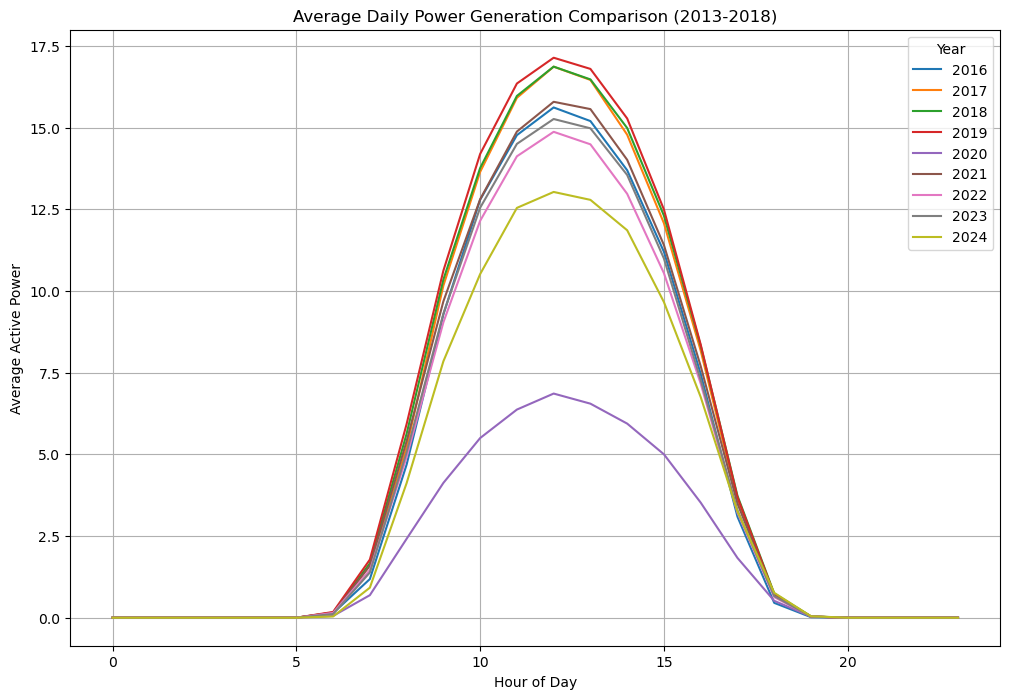

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data_path = '/Users/choon/OneDrive/Desktop/SIT FYP/KCL FYP/Testings/Degradation/Dataset3.0.csv'
df = pd.read_csv(data_path)

# Convert the 'timestamp' column to datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%d/%m/%Y %H:%M')

# Extract year from datetime and create a new column
df['Year'] = df['timestamp'].dt.year

# Filter the dataset to include only the years from 2013 to 2018
#df = df[df['Year'].between(2013, 2018)]

# Group data by year and hour, calculate average power for each time period
avg_daily = df.groupby(['Year', df['timestamp'].dt.hour])['Active_Power'].mean().reset_index()

# Plot average daily power generation for each year
plt.figure(figsize=(12, 8))

for year in sorted(avg_daily['Year'].unique()):
    year_data = avg_daily[avg_daily['Year'] == year]
    plt.plot(year_data['timestamp'], year_data['Active_Power'], label=str(year))

plt.title('Average Daily Power Generation Comparison (2013-2018)')
plt.xlabel('Hour of Day')
plt.ylabel('Average Active Power')
plt.legend(title='Year')
plt.grid(True)
plt.show()


Yearly Degradation Rate: -1.05%


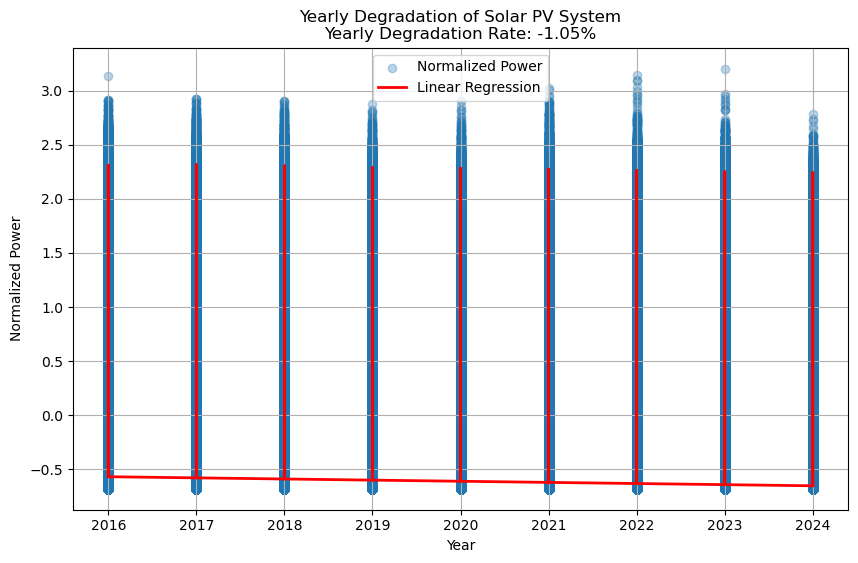

In [12]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from datetime import datetime

# Load the dataset
file_path = '/Users/choon/OneDrive/Desktop/SIT FYP/KCL FYP/Testings/Degradation/Dataset3.0.csv'  # Update this with your actual file path
data = pd.read_csv(file_path)

# Convert date column to datetime
data['timestamp'] = pd.to_datetime(data['timestamp'], format='%d/%m/%Y %H:%M')

# Feature engineering
data['Year'] = data['timestamp'].dt.year

# Normalize the active power
scaler = StandardScaler()
data['Normalized_Power'] = scaler.fit_transform(data[['Active_Power']])

# Prepare the features and target variable
X = data[['Pyranometer_1', 'Year']]
y = data['Normalized_Power']

# Initialize the linear regression model
reg = LinearRegression()

# Fit the model
reg.fit(X, y)

# Extract the coefficients
coefficients = reg.coef_
intercept = reg.intercept_

# Calculate the yearly degradation rate
# Assuming the coefficient for 'Year' is the second one
degradation_rate = coefficients[1] * 100  # in percentage

# Print the degradation rate
print(f"Yearly Degradation Rate: {degradation_rate:.2f}%")

# Predict values using the regression model
y_pred = reg.predict(X)

# Plotting the degradation
plt.figure(figsize=(10, 6))
plt.scatter(data['Year'], data['Normalized_Power'], alpha=0.3, label='Normalized Power')
plt.plot(data['Year'], y_pred, color='red', linewidth=2, label='Linear Regression')
plt.xlabel('Year')
plt.ylabel('Normalized Power')
plt.title(f'Yearly Degradation of Solar PV System\nYearly Degradation Rate: {degradation_rate:.2f}%')
plt.legend()
plt.grid(True)
plt.show()
